In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import ast

In [52]:
# Plotting
import matplotlib as mpl
import seaborn as sns 

mpl.style.use('fivethirtyeight')
sns.set_palette("mako")

mpl.rcParams['font.size'] = 10  # customise font size of a particular graph title, x-axis ticker and y-axis ticker
mpl.rcParams['legend.fontsize'] = 10 # customise legend size
mpl.rcParams['figure.titlesize'] = 15 # customise the size of suptitle
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['legend.markerscale'] = 0.5
mpl.rcParams['lines.markeredgewidth'] = 4

%matplotlib inline

In [53]:
# Load data sets
data_listings = pd.read_csv("data/20-August-2020/listings.csv")
data_listings.head(5)

#data_calendar = pd.read_csv("data/20-August-2020/calendar.csv")
#data_reviews = pd.read_csv("data/20-August-2020/reviews.csv")

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,20200820033947,2020-08-21,An Oasis in the City,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...",https://a0.muscache.com/pictures/2797669/17895...,40855,https://www.airbnb.com/users/show/40855,Colleen,2009-09-23,"Potts Point, New South Wales, Australia","Recently retired, I've lived & worked on 4 con...",NaN,NaN,100%,f,https://a0.muscache.com/im/users/40855/profile...,https://a0.muscache.com/im/users/40855/profile...,Potts Point,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Potts Point, New South Wales, Australia",Sydney,NaN,-33.86917,151.22656,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,0.0,"[""Heating"", ""TV"", ""Garden or backyard"", ""Hot w...",$65.00,2,180,2,2,180,180,2.0,180.0,NaN,t,29,59,89,364,2020-08-21,196,11,0,2009-12-05,2020-03-13,92.0,10.0,9.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,1.50
1,12351,https://www.airbnb.com/rooms/12351,20200820033947,2020-08-22,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",https://a0.muscache.com/pictures/763ad5c8-c951...,17061,https://www.airbnb.com/users/show/17061,Stuart,2009-05-14,"Sydney, New South Wales, Australia","G'Day from Australia!\r\n\r\nHe's Vinh, and I'...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/17061/profile...,https://a0.muscache.com/im/users/17061/profile...,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",t,f,"Pyrmont, New South Wales, Australia",Sydney,NaN,-33.86515,151.19190,Private room in townhouse,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Heating"", ""TV"", ""Garden or backyard"", ""Hot w...","$14,315.00",2,7,2,2,7,7,2.0,7.0,NaN,t,0,0,0,0,2020-08-22,526,4,0,2010-07-24,2019-09-22,95.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,4.28
2,14250,https://www.airbnb.com/rooms/14250,20200820033947,2020-08-22,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,https://a0.muscache.com/pictures/56935671/fdb8...,55948,https://www.airbnb.com/users/show/55948,Heidi,2009-11-20,"Sydney, New South Wales, Australia",I am a Canadian who has made Australia her hom...,within an hour,100%,59%,t,https://a0.muscache.com/im/users/55948/profile...,https://a0.muscache.com/im/users/55948/profile...,Balgowlah,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Balgowlah, New South Wales, Australia",Manly,NaN,-33.80093,151.26172,Entire house,Entire home/apt,6,NaN,3 baths,3.0,3.0,"[""Heating"", ""TV"", ""Garden or backyard"", ""Hot w...",$470.00,5,22,5,5,22,22,5.0,22.0,NaN,t,0,0,0,14,2020-08-22,2,

In [54]:
# What all columns and their data types would be?
data_listings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31391 entries, 0 to 31390
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31391 non-null  int64  
 1   listing_url                                   31391 non-null  object 
 2   scrape_id                                     31391 non-null  int64  
 3   last_scraped                                  31391 non-null  object 
 4   name                                          31382 non-null  object 
 5   description                                   30226 non-null  object 
 6   neighborhood_overview                         19404 non-null  object 
 7   picture_url                                   31391 non-null  object 
 8   host_id                                       31391 non-null  int64  
 9   host_url                                      31391 non-null 

In [55]:
# ! Warnning: override pandas settings to print "Columns" without a limit
pd.set_option("display.max_columns", None)

In [56]:

# Decide what columns contain valuable data and drop others

keep_cols = """id name host_since host_neighbourhood host_response_time       host_response_rate      host_acceptance_rate    host_is_superhost 
host_listings_count	host_total_listings_count host_verifications	host_has_profile_pic	host_identity_verified	
neighbourhood_cleansed latitude	longitude	property_type	room_type	accommodates	bathrooms bathrooms_text	bedrooms	beds	amenities
price	minimum_nights	maximum_nights has_availability	availability_30	availability_60	availability_90	availability_365
number_of_reviews	number_of_reviews_ltm	number_of_reviews_l30d	first_review	last_review	review_scores_rating
review_scores_accuracy	review_scores_cleanliness	review_scores_checkin	review_scores_communication
review_scores_location	review_scores_value	license	instant_bookable	calculated_host_listings_count
calculated_host_listings_count_entire_homes	calculated_host_listings_count_private_rooms	calculated_host_listings_count_shared_rooms
reviews_per_month"""

keep_cols_list = keep_cols.split()
data_listings_cleaned = data_listings[keep_cols_list]

print(f"Cleaned Data: {data_listings_cleaned.shape[0]} Rows and {data_listings_cleaned.shape[1]} Columns")

Cleaned Data: 31391 Rows and 51 Columns


26 Columns has NA values


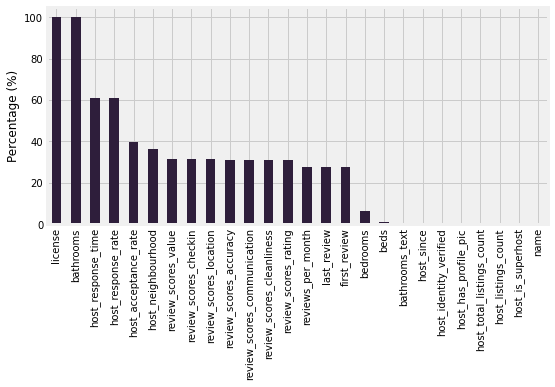

In [57]:
# Deal with NA values: These columns contain NA values
na_columns = data_listings_cleaned.columns[data_listings_cleaned.isnull().sum() > 0]
print(f"{len(na_columns)} Columns has NA values")

N_rows, N_columns = data_listings_cleaned.shape
na_columns_percent = data_listings_cleaned[na_columns].isnull().sum()/N_rows * 100

# plot NA count
plt.figure(figsize=(8,4))
na_columns_percent.sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Percentage (%)")
plt.show()

In [58]:
# Drop columns has NA count > 90%
drop_columns = na_columns_percent[na_columns_percent > 90].index
data_listings_cleaned = data_listings_cleaned.drop(drop_columns, axis=1)

print(f"Cleaned Data: {data_listings_cleaned.shape[0]} Rows and {data_listings_cleaned.shape[1]} Columns")

Cleaned Data: 31391 Rows and 49 Columns


In [59]:
# Remove data depending on:
# 1 Missing critical data: These NA values can not be imputed; Must remove.
remove_columns = ["neighbourhood_cleansed", "bedrooms", "beds"]
print(data_listings_cleaned[remove_columns].isnull().sum())
print(f"df shape: {data_listings_cleaned.shape}")

data_listings_cleaned.dropna(axis=0, how='any', subset=remove_columns, inplace=True)

print(f"New df shape: f{data_listings_cleaned.shape}")

neighbourhood_cleansed       0
bedrooms                  1988
beds                       387
dtype: int64
df shape: (31391, 49)
New df shape: f(29057, 49)


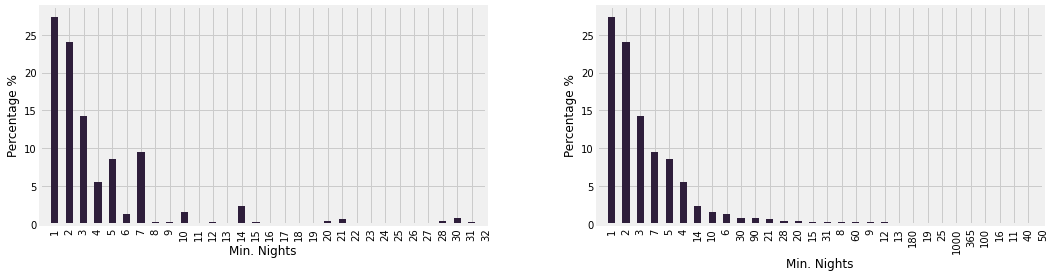

In [60]:
# Remove data depending on:
# 2 un-trusted or outliars 
# - only consider verified hosts
# - only consider listings has less than 14 minimum stays (tourists/travellers would not stay more than that)

# data_listings_cleaned[data_listings_cleaned["host_identity_verified"]=="t"]
# data_listings_cleaned[data_listings_cleaned['minimum_nights'] <= 14].shape

# Plot minimum nights of stay required 
rows, columns = 1, 2
grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)
# (data_listings_cleaned['minimum_nights'].value_counts().sort_index()/data_listings_cleaned.shape[0] * 100).sort_values(ascending=False).plot(kind='bar')
d = data_listings_cleaned['minimum_nights'].value_counts().sort_index()/data_listings_cleaned.shape[0] * 100
# dx = data_listings_cleaned[data_listings_cleaned["room_type"]=="Entire home/apt"]
# d = dx['minimum_nights'].value_counts().sort_index()/data_listings_cleaned.shape[0] * 100

plt.figure(figsize=(16, 4))
plt.subplot(grid[0])
d.plot(kind='bar')
plt.xlim(-1, 30)
plt.ylabel("Percentage %")
plt.xlabel("Min. Nights")

plt.subplot(grid[1])
d.sort_values(ascending=False).plot(kind='bar')
plt.xlim(-1, 30)
plt.ylabel("Percentage %")
plt.xlabel("Min. Nights")

plt.show()

In [61]:
# Price: convert to numeric
data_listings_cleaned['price'] = pd.to_numeric(data_listings_cleaned['price'].apply(lambda x : str(x).replace('$','').replace(",",'')),errors='coerce')

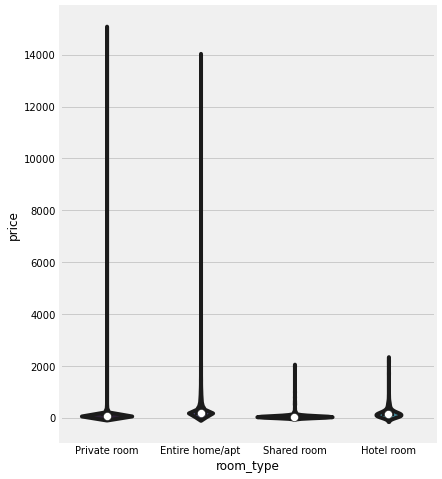

In [62]:
# Explore price distribution
plt.figure(figsize=(6,8))
# d = data_listings_cleaned[data_listings_cleaned["price"] < 500]
d = data_listings_cleaned
s = sns.violinplot(data=d, y='price', x='room_type')
plt.show()

# NOTE: This is hopeless! prices destribution is insanely skewed. Can't remove or consider these large values as 
# outliers. Some listings even have reviews; which means they are real! 

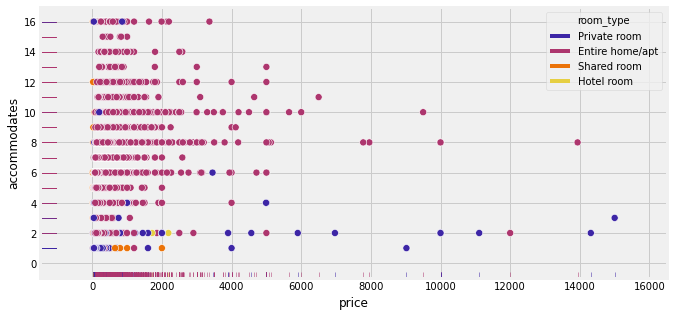

In [64]:
# Visualise prices destribution
plt.figure(figsize=(10,5), frameon=False)   
palette="CMRmap"
sns.scatterplot(data=data_listings_cleaned, x="price", y="accommodates", hue="room_type", s=50, palette=palette)
sns.rugplot(data=data_listings_cleaned, x="price", y="accommodates", hue="room_type", lw=1, alpha=.5, palette=palette)
plt.ylim(-1,17)
# plt.savefig('figs/price.png', dpi=300) 
plt.show() 
# NOTE: It's "Private rooms" and "Entire hoe/apt" has such big prices!

In [46]:
# How much can a room type accommodate?
data_listings_cleaned.groupby(['room_type'])["accommodates"].mean()

room_type
Entire home/apt    4.382514
Hotel room         2.646067
Private room       1.910755
Shared room        1.912127
Name: accommodates, dtype: float64

In [48]:
# Percentage of room types
100 * data_listings_cleaned['room_type'].value_counts() / data_listings_cleaned.shape[0]

Entire home/apt    59.830678
Private room       37.598513
Shared room         1.958220
Hotel room          0.612589
Name: room_type, dtype: float64

<AxesSubplot:ylabel='Frequency'>

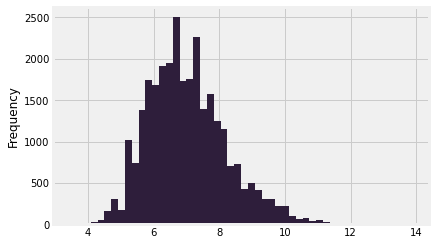

In [14]:
# Try to plot log2(price). It'll scale down everything and should shrink the plot

np.log2(data_listings_cleaned['price']).plot(kind='hist', bins=50)
# data_listings_cleaned['price'].plot(kind='hist', bins=100)
#plt.xlim(-10, 1000)

In [15]:
# Add new column: price per person per night
data_listings_cleaned["price_per_night_person"] = data_listings_cleaned["price"] / data_listings_cleaned["minimum_nights"] / data_listings_cleaned["accommodates"]

# Average price per person per night for each room type
data_listings_cleaned.groupby(["room_type"])["price_per_night_person"].mean()

# NOTE: Interesting! Hotel rooms cost more per person per night

room_type
Entire home/apt    24.267762
Hotel room         73.452629
Private room       31.229630
Shared room        28.047588
Name: price_per_night_person, dtype: float64

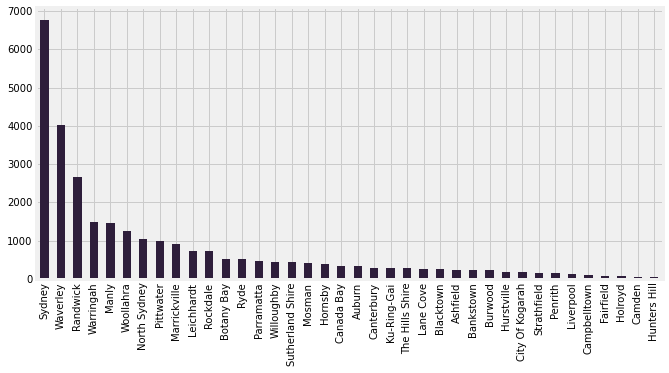

In [16]:
# Neighbourhood: analysis

plt.figure(figsize=(10,5))
d = data_listings_cleaned['neighbourhood_cleansed'].value_counts()
d.plot(kind='bar')

columns_sorted = d.index

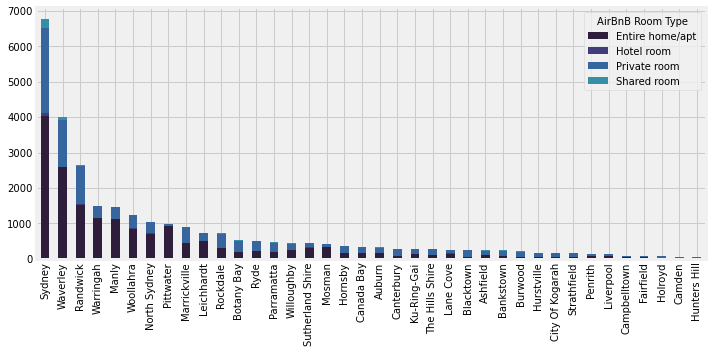

In [17]:
# Neighbourhood: by room_type

rows, columns = 1, 1
fig, axes = plt.subplots(rows,columns,figsize=[10,5], frameon = False)
# fig, axes = plt.subplots(rows,columns,figsize=[10,5])

d = data_listings_cleaned.groupby(['neighbourhood_cleansed'])['room_type'].value_counts().unstack()
d = d.reindex(columns_sorted)
d.plot(kind='bar', stacked=True, ax=axes)
# d[18:].plot(kind='bar', stacked=True, ax=axes)

axes.legend(title='AirBnB Room Type')
plt.xlabel("")
plt.tight_layout()
# plt.savefig("figs/sydney-airbnb-rooms.png", dpi=300)
plt.show()


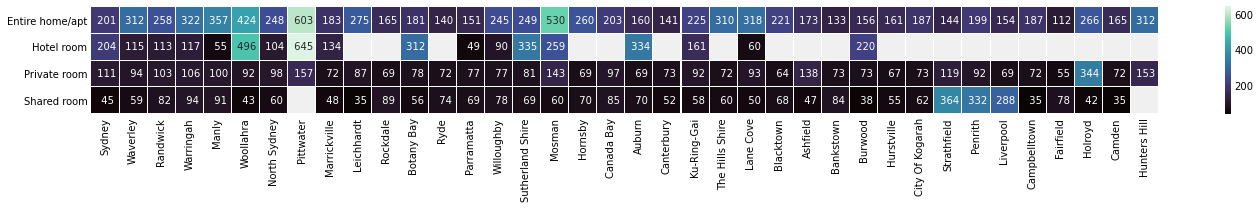

In [18]:
# Neighbourhood: price (mean) comparison

rows, columns = 1, 1
fig, axes = plt.subplots(rows,columns,figsize=[20,3], frameon = False)

d = data_listings_cleaned.groupby(['room_type', 'neighbourhood_cleansed'])['price'].mean().unstack()
# d = data_listings_cleaned.groupby(['room_type', 'neighbourhood_cleansed'])['price_per_night_person'].mean().unstack()
d = d.reindex(columns_sorted, axis=1)

sns.heatmap(d, ax=axes, linewidths=0.02, cmap='mako', annot=True, fmt='4.0f')

plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
# plt.savefig("figs/sydney-airbnb-rooms-price.png", dpi=300)
plt.show()

In [19]:
# Room type capacity: statistics

# data_listings_cleaned[data_listings_cleaned["room_type"]=="Entire home/apt"]["accommodates"].describe()
data_listings_cleaned[data_listings_cleaned["room_type"]=="Shared room"]["accommodates"].describe()

count    569.000000
mean       1.912127
std        1.971454
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       16.000000
Name: accommodates, dtype: float64

In [20]:
# Check columns having Object data type

data_listings.select_dtypes('object').columns

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable'],
      dtype='object')

t    72.96981
f    27.03019
Name: host_identity_verified, dtype: float64

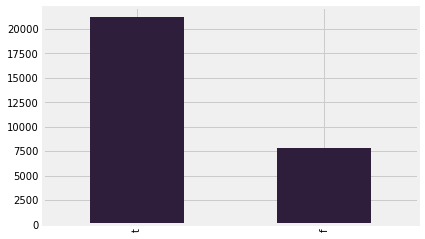

In [21]:
# Host verified? 

d = data_listings_cleaned["host_identity_verified"].value_counts()
d.plot(kind="bar")

# percentage
d/(d.t+d.f) * 100

<AxesSubplot:xlabel='property_type,room_type'>

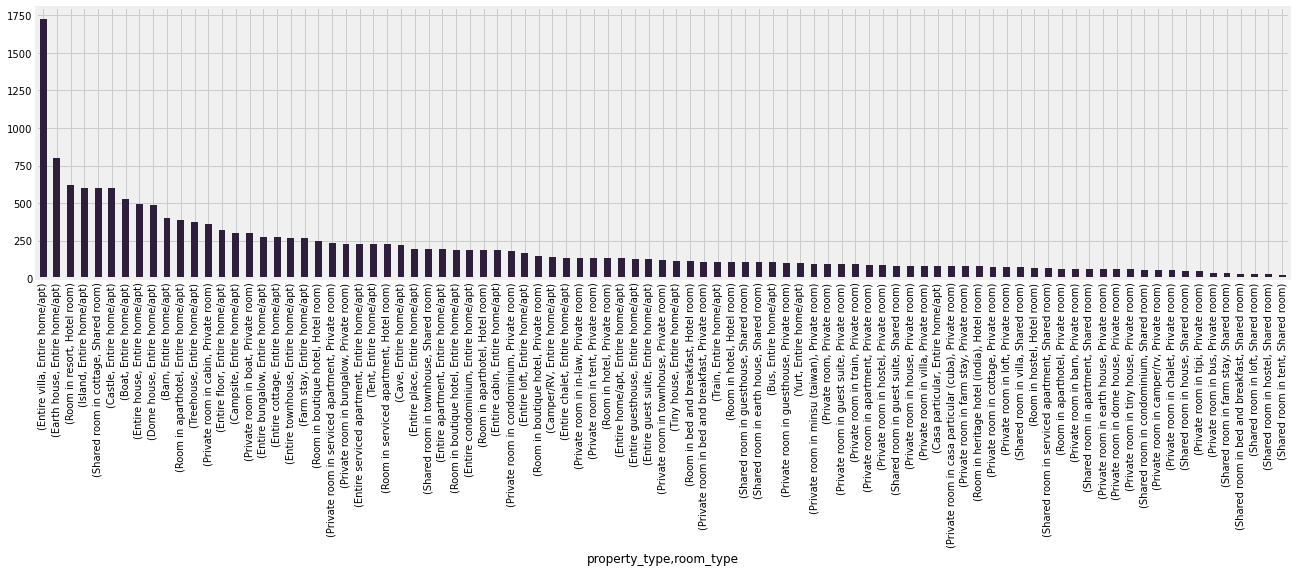

In [22]:
# Price: grouped by property type and room type

plt.figure(figsize=(20,5))
data_listings_cleaned.groupby(['property_type', 'room_type'])['price'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='property_type,room_type'>

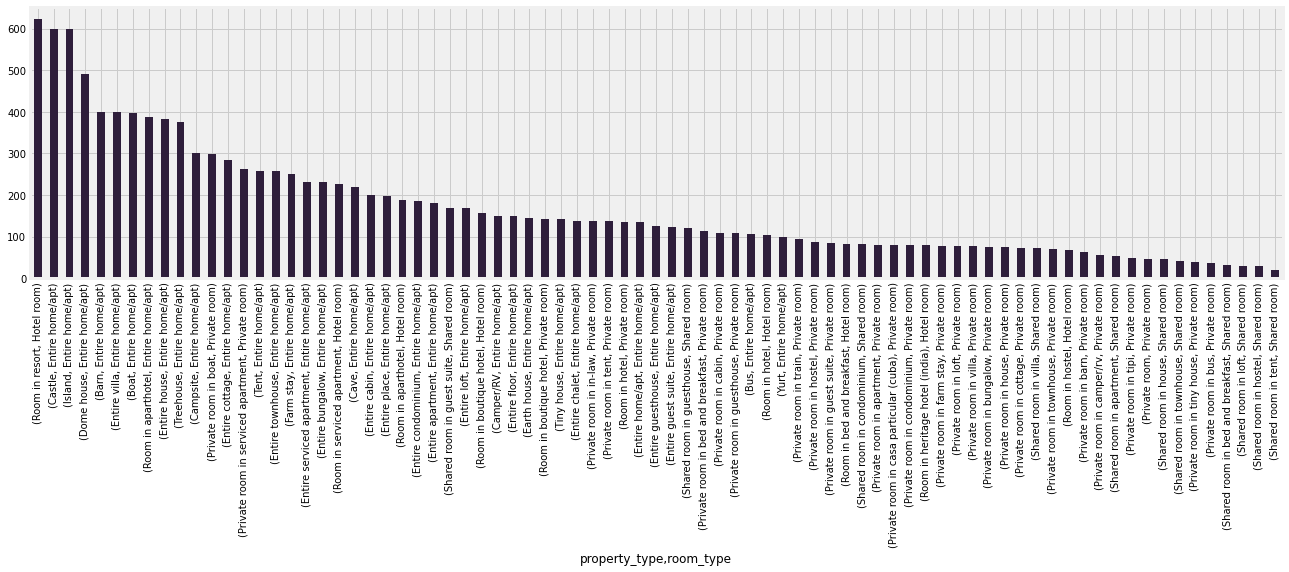

In [23]:
# Price: grouped by property type and room type AND verified host AND price < 1000

plt.figure(figsize=(20,5))
data_listings_cleaned[(data_listings_cleaned["host_identity_verified"]=="t") & (data_listings_cleaned["price"]<1000)].groupby(['property_type', 'room_type'])['price'].mean().sort_values(ascending=False).plot(kind='bar')

In [24]:
# Number of unique property types
len(data_listings_cleaned['property_type'].astype(str).unique())

86

In [25]:
# Explore odd data points

# data_listings_cleaned[(data_listings_cleaned['price'] > 1000) & (data_listings_cleaned['room_type'] > "Private room")].sort_values(by=['price'], ascending=False)
data_listings_cleaned[(data_listings_cleaned['price'] > 500) & (data_listings_cleaned['room_type'] == "Shared room")].sort_values(by=['price'], ascending=False)

,id,name,host_since,host_neighbourhood,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_per_night_person
6247,11658543,1 Spacious Sofa-bed Near DFO Sydney,2015-11-22,Homebush,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Strathfield,-33.85950,151.08126,Shared room in townhouse,Shared room,1,1 shared bath,1.0,1.0,"[""Heating"", ""Essentials"", ""TV"", ""Wifi"", ""Smoke...",1999.0,9,1125,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN,222.111111
15894,23890372,beautiful apartment living room,2017-08-23,Kingsford,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,Randwick,-33.92428,151.22268,Shared room in apartment,Shared room,1,1 shared bath,1.0,1.0,"[""Smoke alarm"", ""Wifi"", ""Elevator"", ""Laptop-fr...",1000.0,14,16,t,0,0,0,0,1,0,0,2018-04-22,2018-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,1,0.04,71.428571
19754,30549619,Horse Alarm,2018-12-05,Kensington,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'offline_government_id', 's...",t,t,Randwick,-33.90809,151.22556,Shared room in guesthouse,Shared room,1,1 shared bath,1.0,1.0,"[""Essentials"", ""TV"", ""Wifi"", ""Smoke alarm"", ""H...",800.0,1,10,t,0,0,0,0,1,0,0,2018-12-06,2018-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,0,1,0.05,800.000000
29478,42314308,this place heart of sydney,2019-04-06,NaN,NaN,NaN,NaN,f,0.0,0.0,"['email', 'phone']",t,f,Rockdale,-33.92936,151.15534,Shared room in apartment,Shared room,1,0 shared baths,1.0,0.0,"[""Iron"", ""Heating"", ""TV"", ""Wifi"", ""Gym"", ""Air ...",655.0,1,7,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,3,0,0,3,NaN,655.000000
21628,33299368,"시드니 몰고아 민박,숙소(휴업중이 아닙니다 메세지 남겨 주세요)",2019-03-24,NaN,NaN,NaN,100%,f,1.0,1.0,"['email', 'phone']",t,f,Penrith,-33.84778,150.60147,Shared room in cottage,Shared room,16,4.5 shared baths,1.0,16.0,"[""Heating"", ""TV"", ""Garden or backyard"", ""Hot w...",600.0,2,60,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,0,1,NaN,18.750000
9973,17465793,In the heart of Liverpool city,2017-02-26,NaN,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone']",t,f,Liverpool,-33.92107,150.92718,Shared room in apartment,Shared room,1,1 shared bath,1.0,1.0,[],530.0,1,1125,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,0,1,NaN,530.000000
18173,28871120,Travellers sofa with bath and OMG views!,2011-11-15,Potts Point,NaN,NaN,NaN,t,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Sydney,-33.86623,151.22396,Shared room in apartment,Shared room,1,1 shared bath,1.0,1.0,"[""Heating"", ""Hot water"", ""Elevator"", ""Laptop-f...",529.0,7,21,t,30,60,90,90,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN,75.571429


<AxesSubplot:>

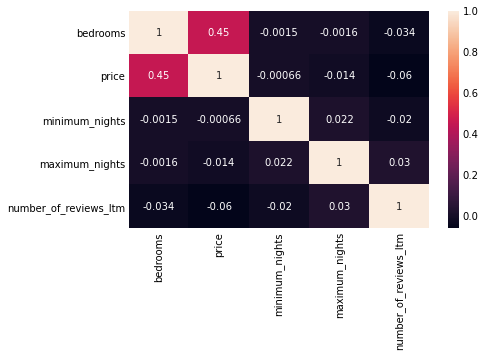

In [26]:
# Correlation 
d = data_listings_cleaned[['bedrooms', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews_ltm']]
sns.heatmap(d.corr(), annot=True)

In [65]:
# Extract all (unique) amenities as a set

def create_amenities_list(amenities, data):
    values_to_add = set(ast.literal_eval(data))
    values_to_add = values_to_add - amenities
    amenities.update(values_to_add)
    
amenities = set()
_d = data_listings_cleaned['amenities'].apply(lambda x: create_amenities_list(amenities, x))

print(f"Number of unique amenities: {len(amenities)}")

Number of unique amenities: 179


In [31]:
# Unpack/Extract amenities from the data set 

amenities_dict = dict()
for k in data_listings_cleaned['room_type'].unique():
    amenities_dict[k] = dict(zip(amenities, [0]*len(amenities)))

def update_amenities_dict(row:pd.Series, amenities_dict=amenities_dict):
    rtype = row.room_type
    for amn in ast.literal_eval(row.amenities):
        amenities_dict[rtype][amn] += 1
        
_d = data_listings_cleaned.apply(lambda x: update_amenities_dict(x), axis=1)

In [68]:
# Convert amenities to a DataFrame

d = pd.DataFrame(amenities_dict)
sorted_cols = d.sum(axis=1).sort_values(ascending=False).index
d = d.reindex(sorted_cols)

d

,Private room,Entire home/apt,Shared room,Hotel room
Kitchen,9802,16834,537,97
Wifi,10128,16076,527,161
Essentials,9777,16227,411,162
Washer,9650,16125,518,95
Smoke alarm,9076,15990,433,154
...,...,...,...,...
Beach,0,1,0,0
Steam room,0,1,0,0
Air hockey table,0,1,0,0
Bicycle,0,1,0,0


In [35]:
# Convert amenities number(s) to a percentage 
dp = d.apply(lambda col: col.apply(lambda row: 100*row/data_listings_cleaned['room_type'].value_counts()[col.name]), axis=0)

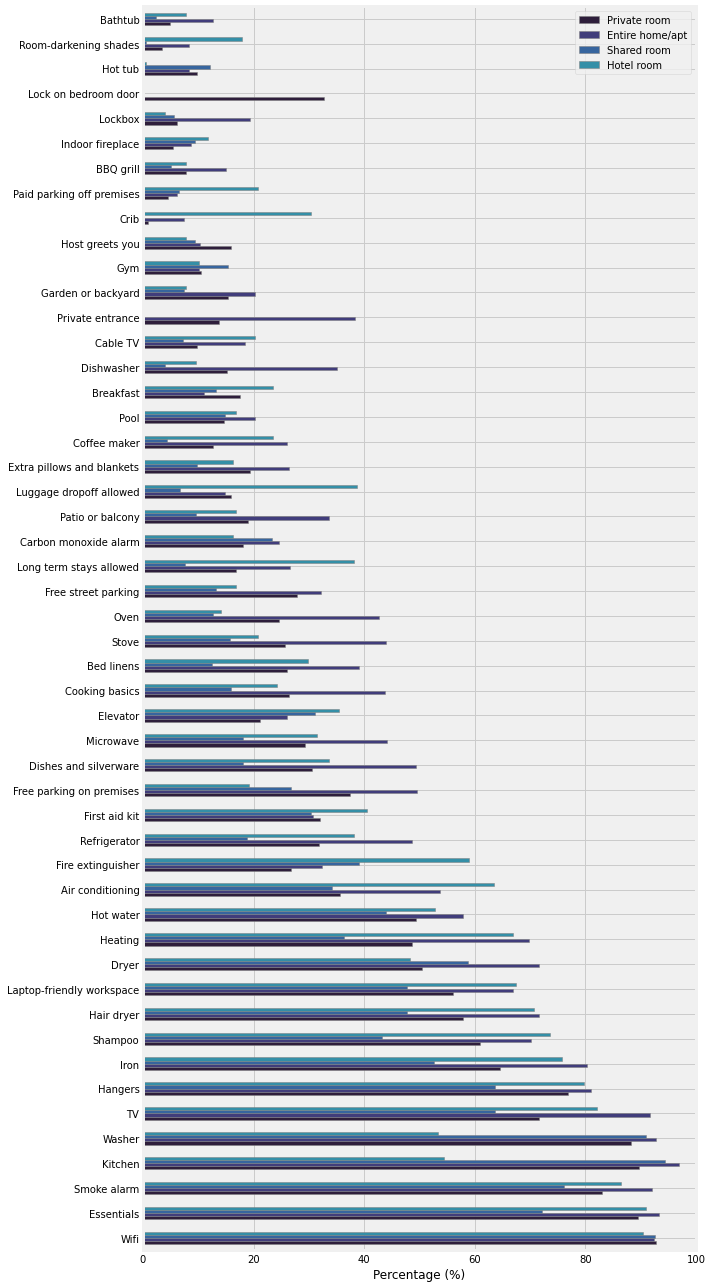

In [36]:
# Sort and visualise amenities

rows, columns = 1, 1
fig, axes = plt.subplots(rows,columns,figsize=[10,18], frameon = False)
# fig, axes = plt.subplots(rows,columns,figsize=[10,5])

dps = dp.reindex(dp.mean(axis=1).sort_values(ascending=False).index)
dps[:50].plot.barh(ax=axes, edgecolor=".5")
# d[18:].plot(kind='bar', stacked=True, ax=axes)

# axes.legend(title='AirBnB Room Type')
plt.xlabel("Percentage (%)")
plt.xlim([0,100])
plt.tight_layout()
# plt.savefig("figs/sydney-airbnb-amenities-50.png", dpi=300)
plt.show()

In [37]:
# Amenities: explore more
dps[8:58]

,Private room,Entire home/apt,Shared room,Hotel room
Shampoo,60.970252,70.238712,43.233743,73.595506
Hair dryer,57.839817,71.578947,47.803163,70.786517
Laptop-friendly workspace,56.118993,66.862238,47.803163,67.415730
Dryer,50.443936,71.544435,58.699473,48.314607
Heating,48.659039,69.790049,36.379613,66.853933
Hot water,49.336384,57.929249,43.936731,52.808989
Air conditioning,35.679634,53.741731,34.270650,63.483146
Fire extinguisher,26.681922,32.407248,39.015817,58.988764
Refrigerator,31.780320,48.559103,18.804921,38.202247
First aid kit,32.018307,30.831176,30.404218,40.449438


In [38]:
# Amenities: explore more
dps[100:150]

,Private room,Entire home/apt,Shared room,Hotel room
Gated property,0.000000,0.074777,0.0,0.0
Media room,0.000000,0.069025,0.0,0.0
Ice machine,0.000000,0.069025,0.0,0.0
Parking,0.000000,0.069025,0.0,0.0
Gas fireplace,0.000000,0.069025,0.0,0.0
Balcony,0.000000,0.069025,0.0,0.0
Espresso machine,0.000000,0.057521,0.0,0.0
Smart TV,0.000000,0.051769,0.0,0.0
Terrace,0.000000,0.051769,0.0,0.0
Dining area for 8 people,0.000000,0.051769,0.0,0.0


In [39]:
# close all previously opened plots
plt.close('all')